In [55]:
from keras import models
from keras import layers

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

# for confusion matrix (old way)
import itertools
from sklearn.metrics import confusion_matrix

# for confusion matrix (new way)
from sklearn.metrics import plot_confusion_matrix

import tensorflow as tf

In [56]:
data_set = pd.read_csv("reg_data.csv")
data_set.head()

,x1,x2,y
0,10,100,50
1,20,20,400
2,30,40,100
3,40,150,380
4,50,151,80


In [57]:
data_set.shape

(30, 3)

## Scalling

In [58]:
data_set["x1"] = data_set["x1"]/data_set["x1"].max()
data_set["x2"] = data_set["x2"]/data_set["x2"].max()
data_set["y"] = data_set["y"]/data_set["y"].max()

In [59]:
data_set["x1"]

0     0.033333
1     0.066667
2     0.100000
3     0.133333
4     0.166667
5     0.200000
6     0.233333
7     0.266667
8     0.300000
9     0.333333
10    0.366667
11    0.400000
12    0.433333
13    0.466667
14    0.500000
15    0.533333
16    0.566667
17    0.600000
18    0.633333
19    0.666667
20    0.700000
21    0.733333
22    0.766667
23    0.800000
24    0.833333
25    0.866667
26    0.900000
27    0.933333
28    0.966667
29    1.000000
Name: x1, dtype: float64

In [60]:
data_set["y"]

0     0.125
1     1.000
2     0.250
3     0.950
4     0.200
5     1.000
6     0.375
7     0.625
8     1.000
9     0.375
10    0.625
11    1.000
12    0.250
13    0.950
14    0.200
15    0.125
16    1.000
17    0.250
18    0.950
19    0.200
20    0.625
21    1.000
22    0.250
23    0.950
24    0.200
25    0.125
26    1.000
27    0.250
28    0.950
29    0.200
Name: y, dtype: float64

In [61]:
X = data_set[["x1"]].to_numpy()
y = data_set["y"].to_numpy()

In [62]:
print(X.shape)
print(y.shape)

(30, 1)
(30,)


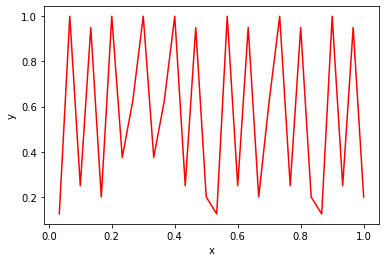

In [63]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(data_set["x1"], data_set["y"], color="red")

plt.show()

In [64]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(6,)


## Paramters

In [66]:
epoch = 100
activ = ["sigmoid", "tanh", "relu", "softmax", "linear"]

#hidden layers
layer_1 = 15
layer_2 = 5

batch_size = 5

## Network

In [67]:
network = models.Sequential()

network.add(layers.Dense(35, activation=activ[2], input_shape = (1,))) # x1 is our inputs
network.add(layers.Dense(25, activation=activ[2]))
network.add(layers.Dense(15, activation=activ[2]))

# Output Layer
network.add(layers.Dense(1, activation=activ[4]))

In [68]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 35)                70        
                                                                 
 dense_13 (Dense)            (None, 25)                900       
                                                                 
 dense_14 (Dense)            (None, 15)                390       
                                                                 
 dense_15 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,376
Trainable params: 1,376
Non-trainable params: 0
_________________________________________________________________


In [69]:
network.compile(loss="mean_squared_error", optimizer=tf.optimizers.Adam(learning_rate=0.1), metrics=["mse"])

In [70]:
history = network.fit(X_train, y_train, epochs=epoch, shuffle=True, verbose=1, validation_split= 0.1)

Epoch 1/100
1/1 [==============================] - 1s 762ms/step - loss: 0.4020 - mse: 0.4020 - val_loss: 2.1865 - val_mse: 2.1865
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 2.4573 - mse: 2.4573 - val_loss: 0.1739 - val_mse: 0.1739
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2077 - mse: 0.2077 - val_loss: 0.3921 - val_mse: 0.3921
Epoch 4/100
1/1 [==============================] - 0s 49ms/step - loss: 0.4304 - mse: 0.4304 - val_loss: 0.2992 - val_mse: 0.2992
Epoch 5/100
1/1 [==============================] - 0s 40ms/step - loss: 0.3288 - mse: 0.3288 - val_loss: 0.1771 - val_mse: 0.1771
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 0.1993 - mse: 0.1993 - val_loss: 0.1162 - val_mse: 0.1162
Epoch 7/100
1/1 [==============================] - 0s 135ms/step - loss: 0.1289 - mse: 0.1289 - val_loss: 0.2276 - val_mse: 0.2276
Epoch 8/100
1/1 [==============================] - 0s 97ms/step - loss: 0.2261 - mse: 0.

In [71]:
score = network.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / mse: {score[1]}')

Test loss: 0.14495885372161865 / mse: 0.14495885372161865


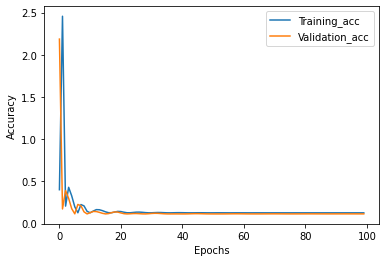

In [72]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.legend(["mse", "Validation_mse"])
plt.show()

# Prediction: if the accuracy is above 80 percent

# Save the model